In [1]:
import pandas as pd

In [2]:
%config Completer.use_jedi = False
pd.options.display.max_columns = False
pd.options.display.max_rows = False

In [3]:
raw_data = pd.read_csv("draft.csv")

In [6]:
df = raw_data.copy()

In [11]:
df.shape

(1854, 18)

In [7]:
pass_filter = (df["event"] == "completed_pass")

In [9]:
pass_df = df[ pass_filter].copy()

In [12]:
pass_df.shape

(791, 18)

In [16]:
pass_df.columns

Index(['start_min', 'start_sec', 'end_min', 'end_sec', 'match_half', 'player1',
       'player1_team', 'player2', 'player2_team', 'event', 'press',
       'press_team', 'start_x', 'start_y', 'end_x', 'end_y', 'press_x',
       'press_y'],
      dtype='object')

In [24]:
pass_df.drop( pass_df.columns[[0,1,2,3,4,5,7,8,10,11,16,17]], axis=1, inplace=True) 

In [25]:
pass_df

,player1_team,event,start_x,start_y,end_x,end_y
1,man_u,completed_pass,52.5,34.0,55.8,31.3
2,man_u,completed_pass,55.8,31.3,65.6,33.4
3,man_u,completed_pass,65.6,33.4,72.2,55.2
8,arsenal,completed_pass,37.6,40.0,28.8,18.3
17,arsenal,completed_pass,57.6,7.6,56.1,10.2
18,arsenal,completed_pass,56.1,10.2,47.6,35.7
20,arsenal,completed_pass,48.7,37.7,67.9,66.2
21,arsenal,completed_pass,67.9,66.2,62.5,62.1
23,arsenal,completed_pass,57.4,62.5,37.8,62.3
...,...,...,...,...,...,...


In [26]:
from PIL import Image

In [27]:
pitch = Image.open("emirates_pitch.png")

In [28]:
import matplotlib.pyplot as plt

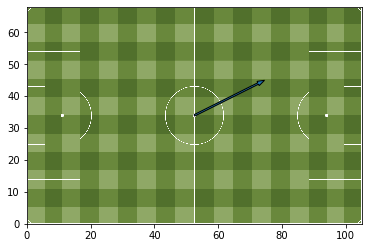

In [36]:
fig, ax = plt.subplots()
ax.imshow(pitch, extent=[0, 105, 0, 68])

plt.arrow(x=52.5, y=34, dx=20, dy=10, width=0.5)

In [37]:
pass_df["dx"] = pass_df["end_x"] - pass_df["start_x"]
pass_df["dy"] = pass_df["end_y"] - pass_df["start_y"]

In [38]:
pass_df

,player1_team,event,start_x,start_y,end_x,end_y,dx,dy
1,man_u,completed_pass,52.5,34.0,55.8,31.3,3.3,-2.7
2,man_u,completed_pass,55.8,31.3,65.6,33.4,9.8,2.1
3,man_u,completed_pass,65.6,33.4,72.2,55.2,6.6,21.8
8,arsenal,completed_pass,37.6,40.0,28.8,18.3,-8.8,-21.7
17,arsenal,completed_pass,57.6,7.6,56.1,10.2,-1.5,2.6
18,arsenal,completed_pass,56.1,10.2,47.6,35.7,-8.5,25.5
20,arsenal,completed_pass,48.7,37.7,67.9,66.2,19.2,28.5
21,arsenal,completed_pass,67.9,66.2,62.5,62.1,-5.4,-4.1
23,arsenal,completed_pass,57.4,62.5,37.8,62.3,-19.6,-0.2
...,...,...,...,...,...,...,...,...


In [39]:
MU_df = pass_df[ pass_df["player1_team"] == "man_u"]

In [41]:
MU_df.shape

(341, 8)

In [42]:
ARS_df = pass_df[ pass_df["player1_team"] == "arsenal"]

In [43]:
ARS_df.shape

(450, 8)

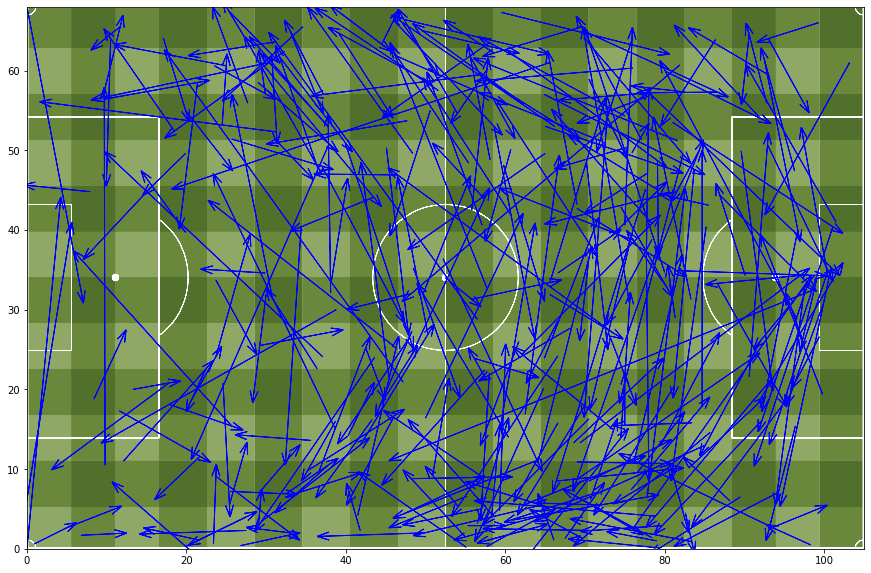

In [55]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(pitch, extent=[0, 105, 0, 68])

for index, row in MU_df.iterrows():
    plt.arrow(x=  row["start_x"] , y= row["start_y"] , dx= row["dx"], dy=  row["dy"], color="blue", head_width=1, overhang=1)
    


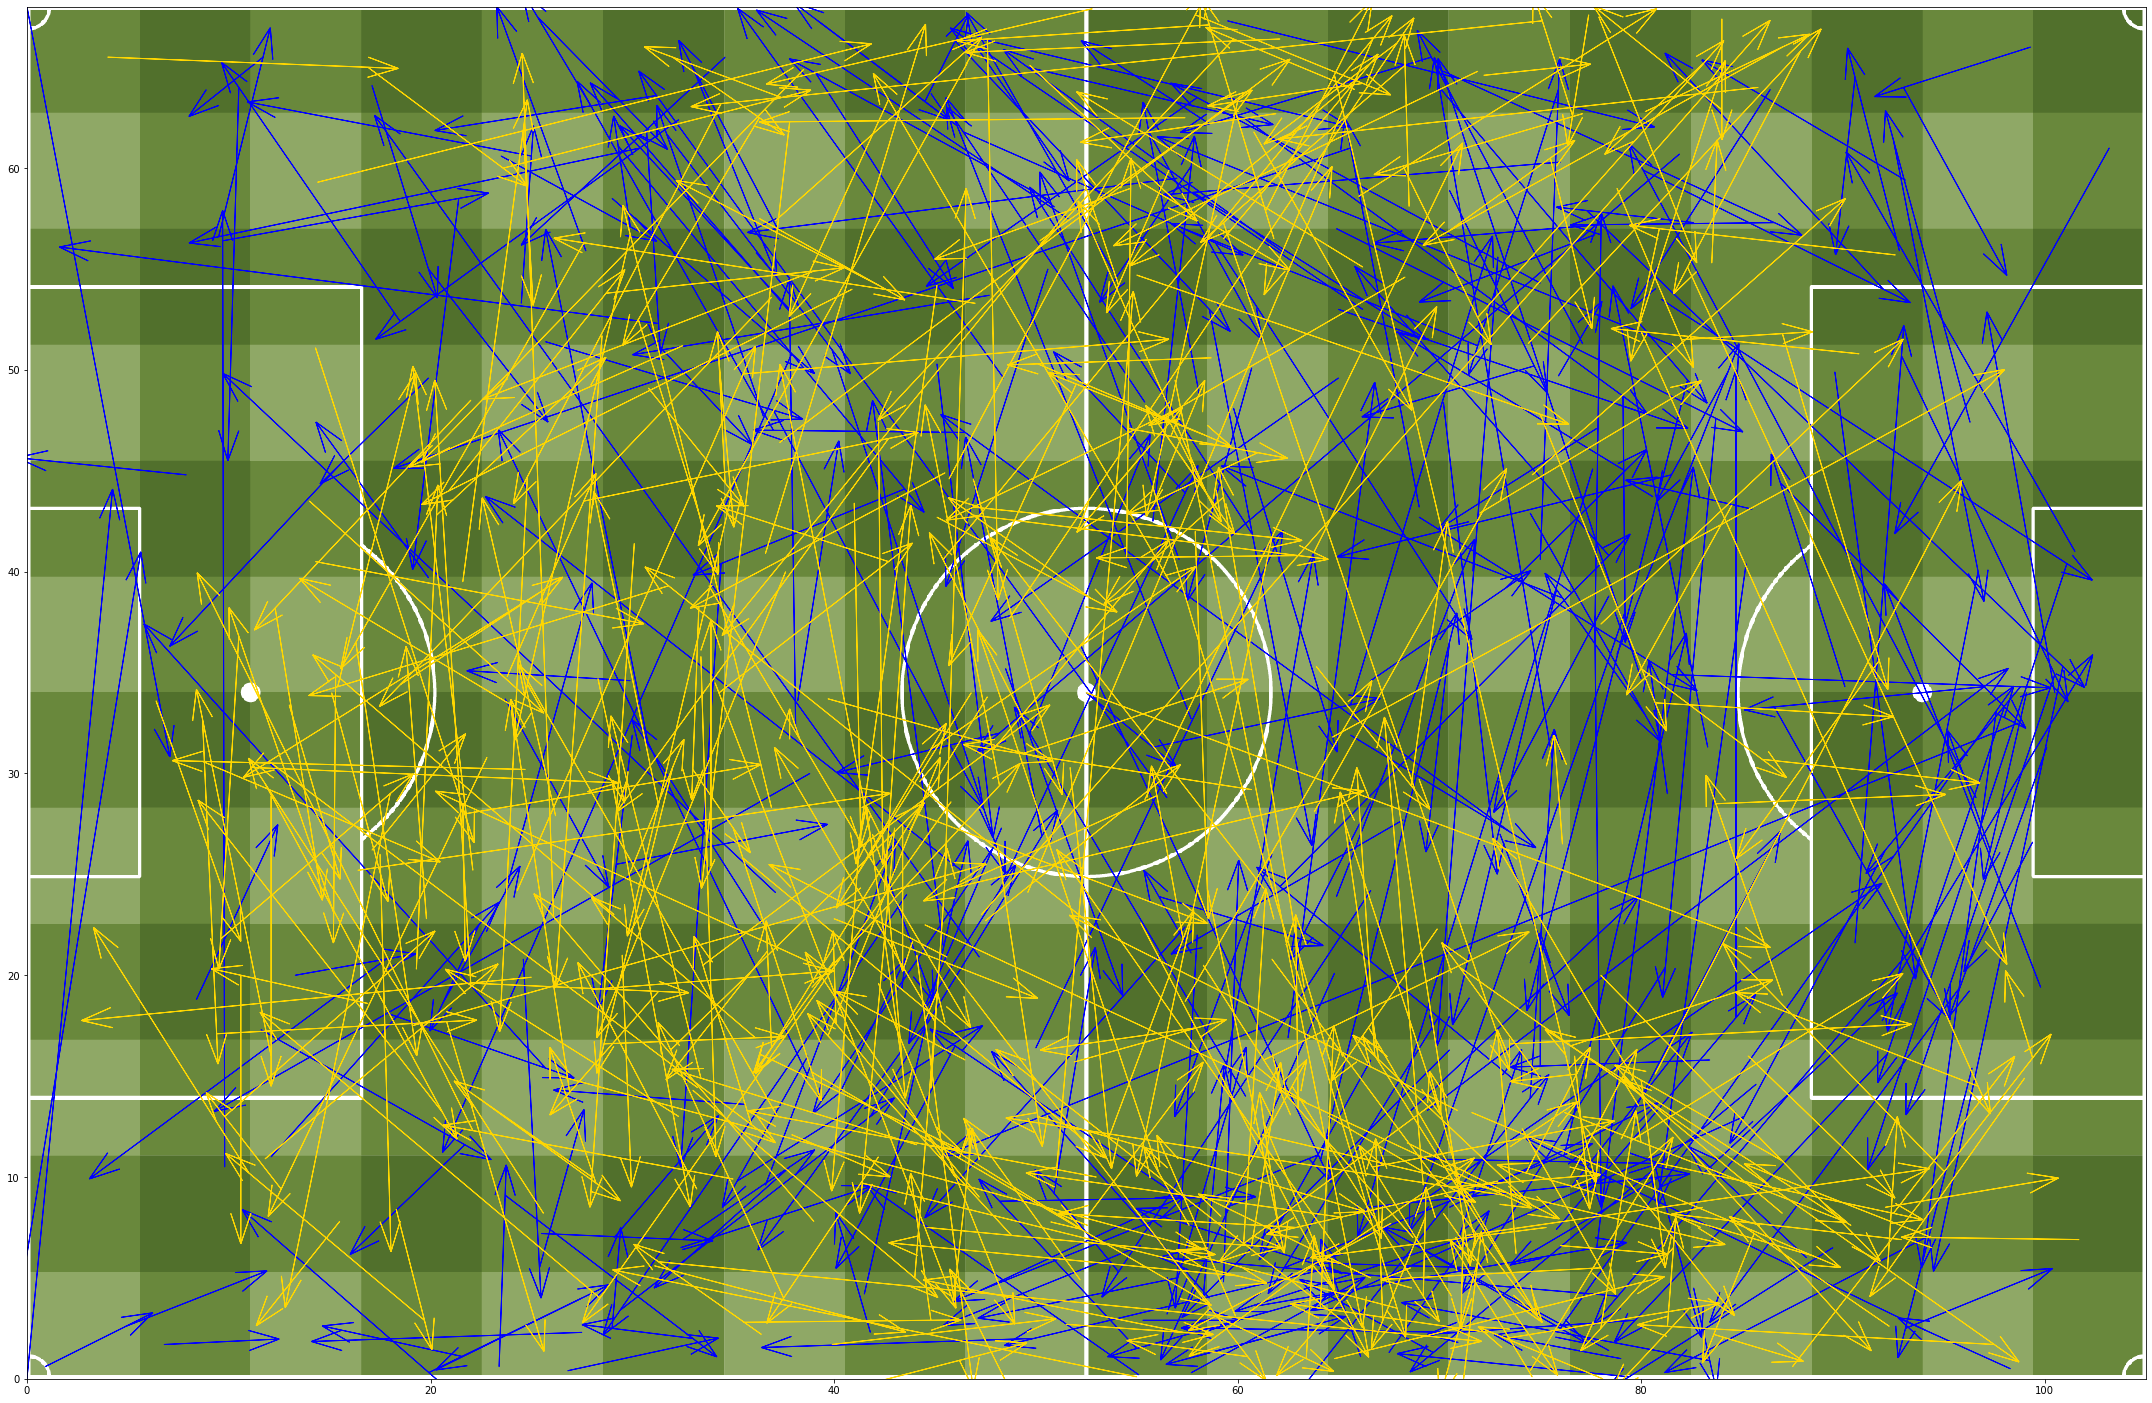

In [61]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.imshow(pitch, extent=[0, 105, 0, 68])

for index, row in MU_df.iterrows():
    plt.arrow(x=  row["start_x"] , y= row["start_y"] , dx= row["dx"], dy=  row["dy"], color="blue", head_width=1, overhang=1)
    
for index, row in ARS_df.iterrows():
    plt.arrow(x=  row["start_x"] , y= row["start_y"] , dx= row["dx"], dy=  row["dy"], color="gold", head_width=1, overhang=1)

plt.tight_layout()
#plt.tight_layout() overhang = 1.5, head_width=1, head_length = 1, linewidth=2
#plt.savefig("team_passes.png")